## Import Libraries

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Load Data

In [416]:
black=pd.read_csv('Black_Friday.csv')

In [417]:
black

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
497991,1004653,P00293342,M,36-45,12,B,3,1,8,NaN,NaN,5824
497992,1004654,P00108542,M,36-45,20,C,3,0,5,8.0,14.0,8580
497993,1004654,P00051442,M,36-45,20,C,3,0,8,17.0,NaN,9828
497994,1004654,P00272042,M,36-45,20,C,3,0,8,14.0,NaN,9977


## A. Data Cleaning

#### Detect Missing Values

In [418]:
black.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            154750
Product_Category_3            345824
Purchase                           0
dtype: int64

#### Since for the column 'Product_Category_3', there are too many missing values over 50% of the total dataset, I decided to drop the column. And for 'Product_Category_2', I would replace the missing values with the mean since it's numeric.

In [422]:
def clean_data(df):
        clean_df=df
        
        #age(turn ordinal column into numeric feature)
        def convert_age(age):
             if type(age) != str:
                return age
             else:
                    if age == "0-17":
                        return 0
                    elif age == '18-25':
                        return 18
                    elif age == '26-35':
                        return 26
                    elif age =='36-45':
                        return 36
                    elif age == '46-50':
                        return 46
                    elif age == '51-55':
                        return 51
                    else:
                        return 55
        
        clean_df.iloc[:,3]=clean_df.iloc[:,3].apply(convert_age)
        
        #Stay_In_Current_City_Years
        def convert_year(year):
             if year == '4+':
                return 4
             else:
                return year
        
        clean_df.iloc[:,6]=clean_df.iloc[:,6].apply(convert_year)
        
        clean_df.iloc[:,6]=clean_df.iloc[:,6].map(int)    #turn the values into numeric type
            
        #User_ID
        clean_df.iloc[:,0]=clean_df.iloc[:,0].map(str)    #turn the column into string type
        
        #Occupation 
        clean_df.iloc[:,4]=clean_df.iloc[:,4].map(str)     #turn the column into string type
          
        #Martial Status
        clean_df.iloc[:,7]=clean_df.iloc[:,7].map(str)     #turn the column into string type
        
        #missing values(Product_Category_2,Product_Category_3)
    
        #for Product_Category_2, I replaced the missing values with the mean
        clean_df.iloc[:,9].fillna(round(clean_df.iloc[:,9].mean()),inplace=True)
    
        #for Product_Category_3, since the number of missing values is over 50% in the column, I decided to drop the column with too many missing values
        clean_df=clean_df.drop(columns='Product_Category_3')
                
    
        return clean_df
        
        

In [423]:
clean_black=clean_data(black)
clean_black

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0,10,A,2,0,3,10.0,8370
1,1000001,P00248942,F,0,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0,10,A,2,0,12,10.0,1422
3,1000001,P00085442,F,0,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55,16,C,4,0,8,10.0,7969
...,...,...,...,...,...,...,...,...,...,...,...
497991,1004653,P00293342,M,36,12,B,3,1,8,10.0,5824
497992,1004654,P00108542,M,36,20,C,3,0,5,8.0,8580
497993,1004654,P00051442,M,36,20,C,3,0,8,17.0,9828
497994,1004654,P00272042,M,36,20,C,3,0,8,14.0,9977


## B. Data Analysis

### 1.Compare number of customers, and total amount of purchase for each gender? Is this a balance dataset with respect to gender?

Text(0.5, 1.0, 'Total Amount of Purchase of Diffenrent Gender')

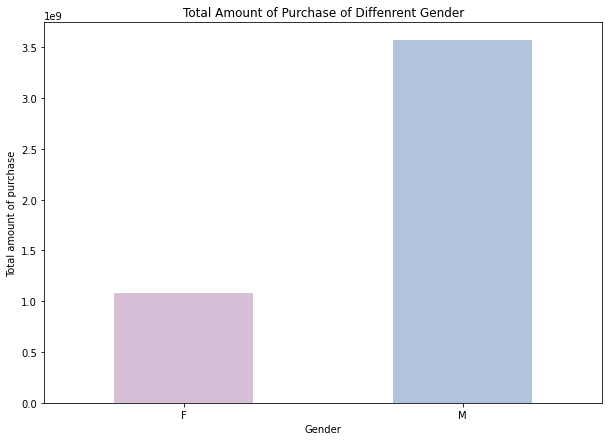

In [424]:
ax=clean_black.groupby('Gender')['Purchase'].sum().plot(kind='bar',subplots=True,color=['thistle','lightsteelblue'],figsize=(10,7))
plt.xlabel('Gender')
plt.ylabel('Total amount of purchase')
plt.xticks(rotation='horizontal')
plt.title('Total Amount of Purchase of Diffenrent Gender')

In [380]:
clean_black.groupby('Gender')['Purchase'].sum()

Gender
F    1078358205
M    3568533248
Name: Purchase, dtype: int64

#### From the output, the total amount purchase for female is 1078358205, and the total amount purchase for male is 3568533248. The dataset is not balanced with respect to gender since the total amount of purchase of male is far more higher than that of female's. 

### 2.Compare total amount of purchase for different cities.

Text(0.5, 1.0, 'Total Amount of Purchase of Diffenrent Cities')

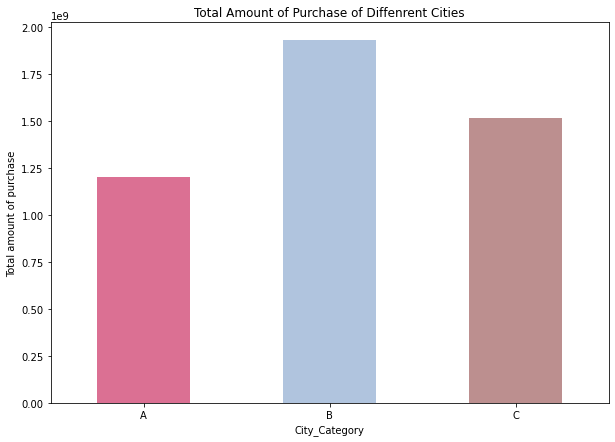

In [381]:
clean_black.groupby('City_Category')['Purchase'].sum().plot.bar(color=['palevioletred','lightsteelblue','rosybrown'],figsize=(10,7))
plt.xlabel('City_Category')
plt.ylabel('Total amount of purchase')
plt.xticks(rotation='horizontal')
plt.title('Total Amount of Purchase of Diffenrent Cities')

In [382]:
clean_black.groupby('City_Category')['Purchase'].sum()

City_Category
A    1200686706
B    1928963340
C    1517241407
Name: Purchase, dtype: int64

#### From the output and the figure, we can see that city B has the highest total amount of purchase of 1928963340, while city A has the lowest total amount of purchase of 1200686706. And the total amount of purchase in city C is 1517241407. 

### 3.Compare total amount of purchase for combinations of gender and age. Which gender and age is better target for marketing campaign?

Text(0.5, 1.0, 'Total Amount of Purchase of \n Different Gender and Age Groups')

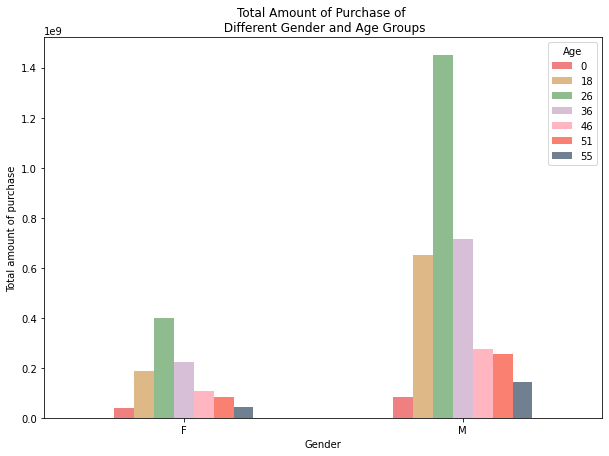

In [383]:
clean_black.groupby(['Gender','Age'])['Purchase'].sum().unstack().reset_index().plot.bar(x='Gender',color=['lightcoral','burlywood','darkseagreen','thistle','lightpink','salmon','slategrey'],figsize=(10,7))
plt.ylabel('Total amount of purchase')
plt.xticks(rotation='horizontal')
plt.title('Total Amount of Purchase of \n Different Gender and Age Groups')

In [384]:
clean_black.groupby(['Gender','Age'])['Purchase'].sum()

Gender  Age
F       0        38858341
        18      187842163
        26      400580225
        36      221952029
        46      105771109
        51       81836929
        55       41517409
M       0        84500331
        18      649284767
        26     1448558028
        36      714331811
        46      276334871
        51      254063010
        55      141460430
Name: Purchase, dtype: int64

In [385]:
print('The combination of Male in the age of 26 (representing 26-35) is the better target in the market with the maximum total purchase amount of ', max(clean_black.groupby(['Gender','Age'])['Purchase'].sum()))

The combination of Male in the age of 26 (representing 26-35) is the better target in the market with the maximum total purchase amount of  1448558028


#### Form the output, since the combination of Male with the age of 26 (26-35) has the maximum total purchase amount 1448558028, it is the better target for marketing campaign.

### 4.Using box and whisker plot, compare distribution of purchase amounts among combinations of genders and age.

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

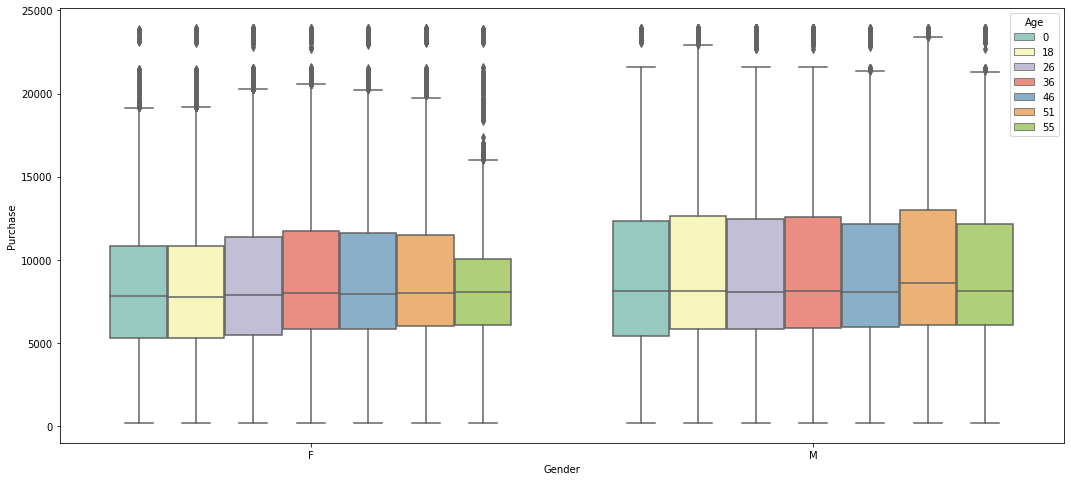

In [386]:
fig,ax=plt.subplots()
fig.set_size_inches(18,8)
sns.boxplot(x='Gender',y='Purchase',hue='Age',data=clean_black,palette='Set3',ax=ax)

#### From the boxplot, we can find that the combination of Male with the age of 51(representing 51-55) has the highest mean purchase amount. And all combination contains outliers. For all Male combinations (the group on the right), they are skewed to the right.

### 5.Using box and whisker plot, compare distribution of purchase amounts among different occupations.

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

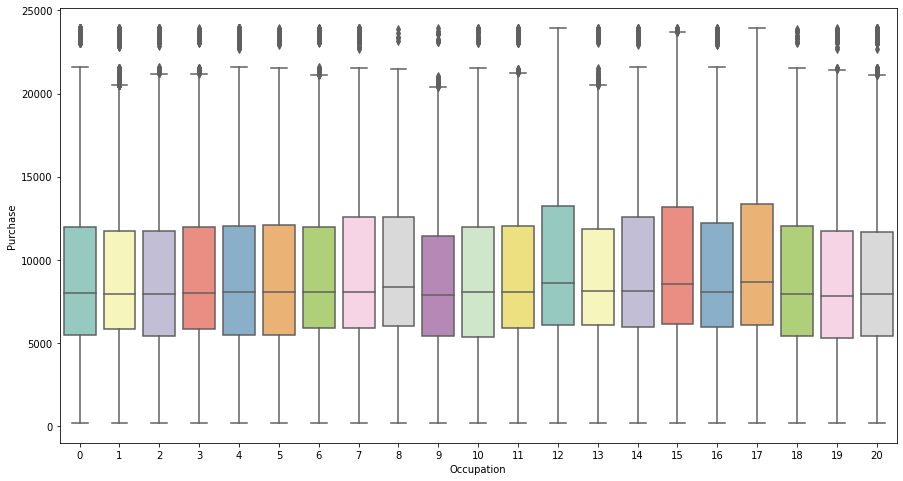

In [387]:
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
sns.boxplot(x='Occupation',y='Purchase',data=clean_black,palette='Set3',ax=ax,order=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'])

#### From the boxplot, we can see that the Occupation 17 has the highest purchase amounts. And only for Occupation 17 and 12, there are no outliers. And they are all skewed to the right.

### 6.Create a heatmap or scatter plot showing correlation matrix of all of two numerical features. Which features are positively correlated with purchase amount?

In [388]:
heat_black=clean_black.loc[:,['Age','Stay_In_Current_City_Years','Product_Category_1','Product_Category_2','Purchase']]

In [389]:
heat_black

,Age,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Purchase
0,0,2,3,10.0,8370
1,0,2,1,6.0,15200
2,0,2,12,10.0,1422
3,0,2,12,14.0,1057
4,55,4,8,10.0,7969
...,...,...,...,...,...
497991,36,3,8,10.0,5824
497992,36,3,5,8.0,8580
497993,36,3,8,17.0,9828
497994,36,3,8,14.0,9977


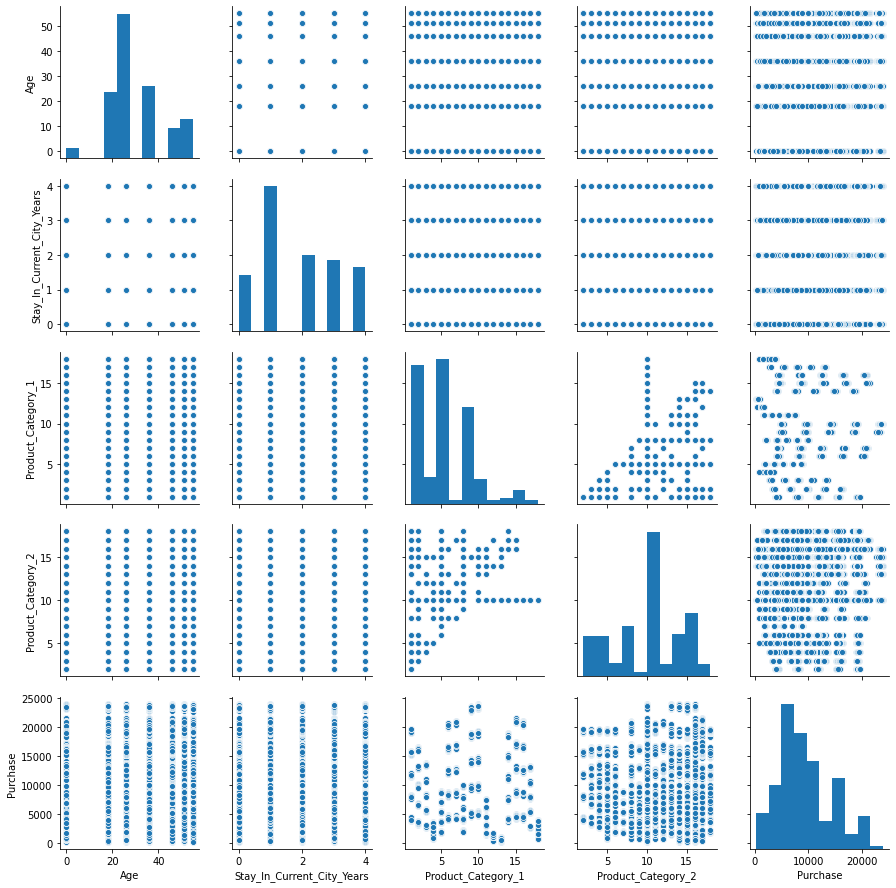

In [185]:
sns.pairplot(heat_black)

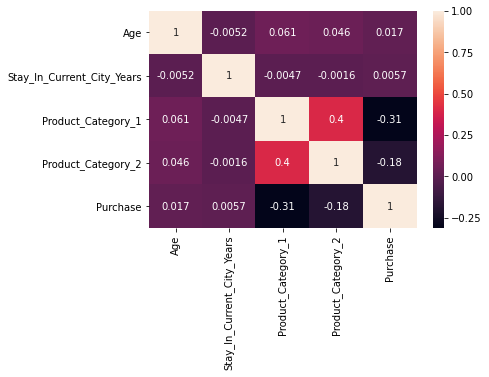

In [390]:
sns.heatmap(heat_black.corr(),annot=True)
plt.show()

#### From the heatmap, we can see the features 'Age' and 'Stay_In_Current_City_Years' are positively related to purchase amount.

## C. Data Modeling

### 1. Feature Engineering

### One-hot Encoding for Categorical Columns

In [391]:
gender_dummy=pd.get_dummies(clean_black['Gender'])
occupation_dummy=pd.get_dummies(clean_black['Occupation'],prefix='Occupation')
city_dummy=pd.get_dummies(clean_black['City_Category'],prefix='City')
marital_dummy=pd.get_dummies(clean_black['Marital_Status'],prefix='Marital')

#### Since for categorical columns User_ID and Product_ID, there are too many features, after I ran the code, it would show memory error, then I decided to exclude these two columns in my model.

In [392]:
feature_black=pd.concat([clean_black,gender_dummy,occupation_dummy,city_dummy,marital_dummy],axis=1)     #only containing the features
feature_black=feature_black.drop(columns=['User_ID','Product_ID','Gender','Occupation','City_Category','Marital_Status','Purchase'])
feature_black

,Age,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,F,M,Occupation_0,Occupation_1,Occupation_10,Occupation_11,...,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,City_A,City_B,City_C,Marital_0,Marital_1
0,0,2,3,10.0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,0,2,1,6.0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,0,2,12,10.0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,0,2,12,14.0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,55,4,8,10.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497991,36,3,8,10.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
497992,36,3,5,8.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
497993,36,3,8,17.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
497994,36,3,8,14.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [393]:
new_black=pd.concat([feature_black,clean_black['Purchase']],axis=1)   #add the dependent variable to the last column
new_black

,Age,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,F,M,Occupation_0,Occupation_1,Occupation_10,Occupation_11,...,Occupation_6,Occupation_7,Occupation_8,Occupation_9,City_A,City_B,City_C,Marital_0,Marital_1,Purchase
0,0,2,3,10.0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,8370
1,0,2,1,6.0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,15200
2,0,2,12,10.0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1422
3,0,2,12,14.0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1057
4,55,4,8,10.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497991,36,3,8,10.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,5824
497992,36,3,5,8.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,8580
497993,36,3,8,17.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,9828
497994,36,3,8,14.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,9977


### Normalization

In [394]:
from sklearn.preprocessing import MinMaxScaler

norm=MinMaxScaler().fit(new_black.loc[:,['Age','Stay_In_Current_City_Years','Product_Category_1','Product_Category_2']])
new_black.loc[:,['Age','Stay_In_Current_City_Years','Product_Category_1','Product_Category_2']]=norm.transform(new_black.loc[:,['Age','Stay_In_Current_City_Years','Product_Category_1','Product_Category_2']])

In [395]:
new_black

,Age,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,F,M,Occupation_0,Occupation_1,Occupation_10,Occupation_11,...,Occupation_6,Occupation_7,Occupation_8,Occupation_9,City_A,City_B,City_C,Marital_0,Marital_1,Purchase
0,0.000000,0.50,0.117647,0.5000,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,8370
1,0.000000,0.50,0.000000,0.2500,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,15200
2,0.000000,0.50,0.647059,0.5000,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1422
3,0.000000,0.50,0.647059,0.7500,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1057
4,1.000000,1.00,0.411765,0.5000,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497991,0.654545,0.75,0.411765,0.5000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,5824
497992,0.654545,0.75,0.235294,0.3750,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,8580
497993,0.654545,0.75,0.411765,0.9375,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,9828
497994,0.654545,0.75,0.411765,0.7500,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,9977


### 2.Linear Regression Model

### Split the Dataset into Traning Data and Test Data

In [396]:
X=new_black.iloc[:,:-1]
y=new_black['Purchase']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

### Fit the Model

In [397]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [398]:
y_pred = model.predict(X_test)

### Print MSE and MAE

#### MSE is mean squared error, and MAE is mean absolute error. MSE measures the squared average distance between the real data and the predicted data. MAE measures the absolute average distance between the real data and the predicted data.

In [399]:
print('Mean squared error (MSE) is : {:.5f}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error (MAE) is : {:.5f}'.format(mean_absolute_error(y_test, y_pred)))

Mean squared error (MSE) is : 21878706.86041
Mean absolute error (MAE) is : 3596.44132


### 3. Apply the Feature Engineering and Regression Model to Test Dataset

### Load Data

In [404]:
test_black=pd.read_csv('Black_Friday_Final_Test.csv')
test_black

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1004655,P00031042,F,26-35,1,A,3,0,8,NaN,NaN,10006
1,1004655,P00303042,F,26-35,1,A,3,0,5,NaN,NaN,5152
2,1004655,P00085442,F,26-35,1,A,3,0,12,14.0,NaN,1430
3,1004655,P00058142,F,26-35,1,A,3,0,3,4.0,12.0,11063
4,1004655,P00316742,F,26-35,1,A,3,0,4,5.0,NaN,2070
...,...,...,...,...,...,...,...,...,...,...,...,...
39576,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
39577,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
39578,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
39579,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


### Detect Missing Values

In [405]:
test_black.isnull().sum()  #also drop product_category_3 since it contains over 50% missing values of the column

User_ID                           0
Product_ID                        0
Gender                            0
Age                               0
Occupation                        0
City_Category                     0
Stay_In_Current_City_Years        0
Marital_Status                    0
Product_Category_1                0
Product_Category_2            12236
Product_Category_3            27475
Purchase                          0
dtype: int64

### Data Cleaning

In [402]:
clean_test_black=clean_data(test_black)
clean_test_black

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1004655,P00031042,F,26,1,A,3,0,8,10.0,10006
1,1004655,P00303042,F,26,1,A,3,0,5,10.0,5152
2,1004655,P00085442,F,26,1,A,3,0,12,14.0,1430
3,1004655,P00058142,F,26,1,A,3,0,3,4.0,11063
4,1004655,P00316742,F,26,1,A,3,0,4,5.0,2070
...,...,...,...,...,...,...,...,...,...,...,...
39576,1004737,P00193542,M,36,16,C,1,0,1,2.0,11664
39577,1004737,P00111142,M,36,16,C,1,0,1,15.0,19196
39578,1004737,P00345942,M,36,16,C,1,0,8,15.0,8043
39579,1004737,P00285842,M,36,16,C,1,0,5,10.0,7172


### One-Hot Encoding

In [406]:
gender_dummy1=pd.get_dummies(clean_test_black['Gender'])
occupation_dummy1=pd.get_dummies(clean_test_black['Occupation'],prefix='Occupation')
city_dummy1=pd.get_dummies(clean_test_black['City_Category'],prefix='City')
marital_dummy1=pd.get_dummies(clean_test_black['Marital_Status'],prefix='Marital')

In [408]:
feature_black=pd.concat([clean_test_black,gender_dummy1,occupation_dummy1,city_dummy1,marital_dummy1],axis=1)
feature_black=feature_black.drop(columns=['User_ID','Product_ID','Gender','Occupation','City_Category','Marital_Status','Purchase'])
feature_black

,Age,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,F,M,Occupation_0,Occupation_1,Occupation_10,Occupation_11,...,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,City_A,City_B,City_C,Marital_0,Marital_1
0,26,3,8,10.0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,26,3,5,10.0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,26,3,12,14.0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,26,3,3,4.0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,26,3,4,5.0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39576,36,1,1,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
39577,36,1,1,15.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
39578,36,1,8,15.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
39579,36,1,5,10.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [409]:
new_black=pd.concat([feature_black,clean_test_black['Purchase']],axis=1)
new_black

,Age,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,F,M,Occupation_0,Occupation_1,Occupation_10,Occupation_11,...,Occupation_6,Occupation_7,Occupation_8,Occupation_9,City_A,City_B,City_C,Marital_0,Marital_1,Purchase
0,26,3,8,10.0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,10006
1,26,3,5,10.0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,5152
2,26,3,12,14.0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1430
3,26,3,3,4.0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,11063
4,26,3,4,5.0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,2070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39576,36,1,1,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,11664
39577,36,1,1,15.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,19196
39578,36,1,8,15.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,8043
39579,36,1,5,10.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,7172


### Normalization

In [410]:
norm=MinMaxScaler().fit(new_black.loc[:,['Age','Stay_In_Current_City_Years','Product_Category_1','Product_Category_2']])
new_black.loc[:,['Age','Stay_In_Current_City_Years','Product_Category_1','Product_Category_2']]=norm.transform(new_black.loc[:,['Age','Stay_In_Current_City_Years','Product_Category_1','Product_Category_2']])

In [411]:
new_black

,Age,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,F,M,Occupation_0,Occupation_1,Occupation_10,Occupation_11,...,Occupation_6,Occupation_7,Occupation_8,Occupation_9,City_A,City_B,City_C,Marital_0,Marital_1,Purchase
0,0.472727,0.75,0.411765,0.5000,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,10006
1,0.472727,0.75,0.235294,0.5000,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,5152
2,0.472727,0.75,0.647059,0.7500,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1430
3,0.472727,0.75,0.117647,0.1250,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,11063
4,0.472727,0.75,0.176471,0.1875,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,2070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39576,0.654545,0.25,0.000000,0.0000,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,11664
39577,0.654545,0.25,0.000000,0.8125,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,19196
39578,0.654545,0.25,0.411765,0.8125,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,8043
39579,0.654545,0.25,0.235294,0.5000,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,7172


### Fit the Model

In [412]:
Xn=new_black.iloc[:,:-1]
yn=new_black['Purchase']
model.fit(Xn, yn)

LinearRegression()

In [413]:
y_pred = model.predict(Xn)

### Print MSE and MAE

In [414]:
print('Mean squared error (MSE) is : {:.5f}'.format(mean_squared_error(yn, y_pred)))
print('Mean absolute error (MAE) is : {:.5f}'.format(mean_absolute_error(yn, y_pred)))

Mean squared error (MSE) is : 21831874.05359
Mean absolute error (MAE) is : 3598.55120
